<a href="https://colab.research.google.com/github/NikolasGialitsis/Xray_Manipulation/blob/master/Xray_image_conversion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
'''
!pip install matplotlib
!pip install scikit-image
!pip install pillow
!pip install opencv-python 
'''

'\n!pip install matplotlib\n!pip install scikit-image\n!pip install pillow\n!pip install opencv-python \n'

(<matplotlib.axes._subplots.AxesSubplot at 0x7f476f66c6d8>,
 <matplotlib.image.AxesImage at 0x7f476d5f7748>)

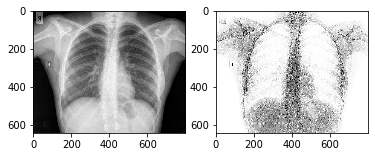

In [90]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
im1 = cv2.imread('image_1.jpg',0) # loads in grayscale
im2 = cv2.imread('image_2.jpg',0) # loads in grayscale

plt.subplot(121), plt.imshow(im1, cmap='gray')
plt.subplot(122), plt.imshow(im2, cmap='gray')

## Equalization

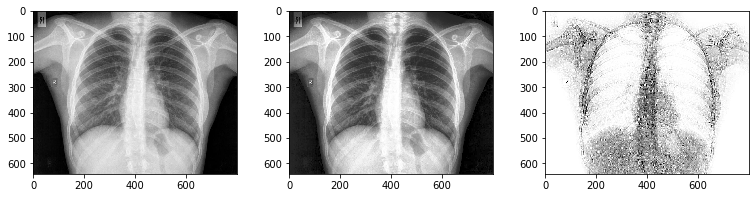

In [91]:
equ = cv2.equalizeHist(im1)
fig, axes = plt.subplots(1, 2, figsize=(13,3))

plt.subplot(131), plt.imshow(im1, cmap='gray')
plt.subplot(132), plt.imshow(equ, cmap='gray')
plt.subplot(133), plt.imshow(im2, cmap='gray')
plt.show()

im1=equ

## Complement

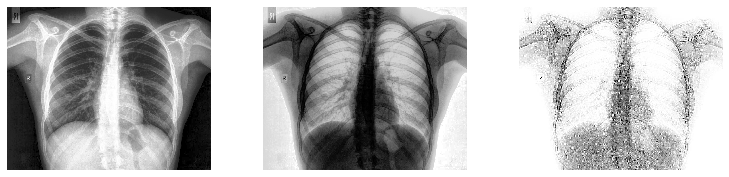

In [92]:
res = (255-im1)

fig, axes = plt.subplots(1, 3, figsize=(13,3))
plt.subplot(131), plt.imshow(im1, cmap='gray'), plt.axis('off')
plt.subplot(132), plt.imshow(res, cmap='gray'), plt.axis('off')
plt.subplot(133), plt.imshow(im2, cmap='gray'), plt.axis('off')
plt.show()

im1=res

## Brightness

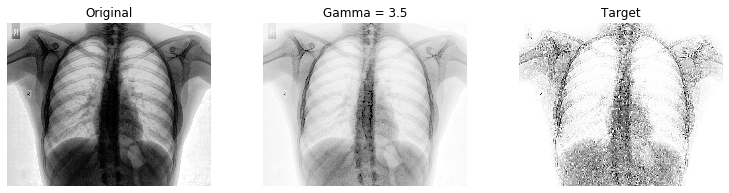

In [93]:
import numpy as np
def adjust_gamma(image, gamma=1.0):
    # build a lookup table mapping the pixel values [0, 255] to
    # their adjusted gamma values
    invGamma = 1.0 / gamma
    table = np.array([((i / 255.0) ** invGamma) * 255
        for i in np.arange(0, 256)]).astype("uint8")

    # apply gamma correction using the lookup table
    return cv2.LUT(image, table)

fig, axes = plt.subplots(1, 3, figsize=(13,3))
plt.subplot(131), plt.imshow(im1,cmap="gray"), plt.axis('off'), plt.title('Original')

gamma = 4.0
adjusted = adjust_gamma(im1, gamma=gamma)
plt.subplot(132), plt.imshow(adjusted,cmap="gray"), plt.axis('off'), plt.title('Gamma = 3.5')

plt.subplot(133), plt.imshow(im2,cmap="gray"), plt.axis('off'), plt.title('Target')
plt.show()

im1=adjusted

## Unsharp

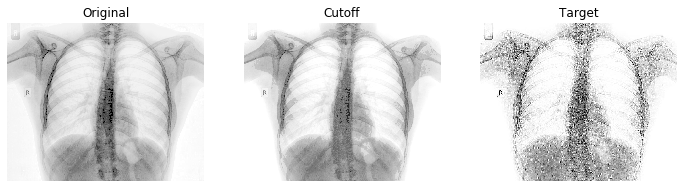

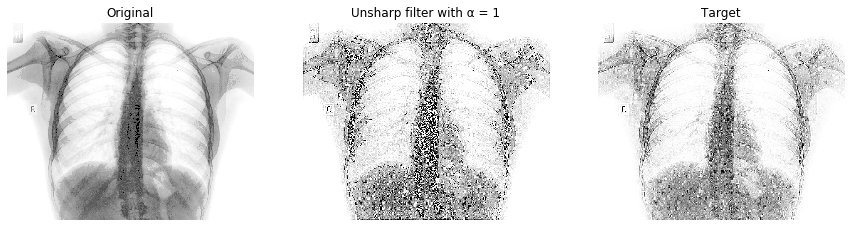

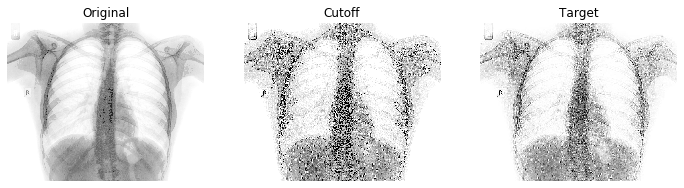

In [94]:
temp = im1.copy()
nrows,ncols = temp.shape

low = 200
high = 100
for row in range(nrows):
  for col in range(ncols):
    if temp[row,col] > low:
      if temp[row,col] + 15 > 255:
        temp[row,col] = 255
      else:
        temp[row,col] = temp[row,col] + 15

    elif temp[row,col] < high:
      temp[row,col] = temp[row,col] + 40


# dst = cv2.filter2D(img,-1,kernel)
fig, axes = plt.subplots(1, 2, figsize=(12,5))
plt.subplot(131), plt.imshow(im1, cmap='gray',vmin=0, vmax=255), plt.title('Original'), 
plt.axis('off')
plt.subplot(132), plt.imshow(temp, cmap='gray',vmin=0, vmax=255), plt.title('Cutoff'), 
plt.axis('off')
plt.subplot(133), plt.imshow(im2, cmap='gray',vmin=0, vmax=255), plt.title('Target'), 
plt.axis('off')
plt.show() 

im1 = temp

def unsharp(alpha=0.2):
    A1 = np.array([[-1,1,-1],[1,1,1],[-1,1,-1]])
    A2 = np.array([[0,-1,0],[-1,5,-1],[0,-1,0]])
    return (alpha*A1+A2)/(alpha+1)


fig, axes = plt.subplots(1, 3, figsize=(15,7))
plt.subplot(131), plt.imshow(im1, cmap='gray'), plt.title('Original'), 
plt.axis('off')


kernel = unsharp(0.2)
dst1 = cv2.filter2D(im1, -1, kernel, borderType=cv2.BORDER_CONSTANT)

kernel = unsharp(0.2)
dst1 = cv2.filter2D(dst1, -1, kernel, borderType=cv2.BORDER_CONSTANT)

#dst1 = cv2.filter2D(dst1, -1, kernel, borderType=cv2.BORDER_CONSTANT)
plt.subplot(132), plt.imshow(dst1, cmap='gray',vmin=0, vmax=255), plt.title('Unsharp filter with α = 1'), 
plt.axis('off')

plt.subplot(133), plt.imshow(im2, cmap='gray',vmin=0, vmax=255), plt.title('Target'), 
plt.axis('off')
plt.show()



temp = dst1.copy()
nrows,ncols = temp.shape


for row in range(nrows):
  for col in range(ncols):
    if (col > (47*ncols/100)) and (col < (55*ncols/100)):
      if (row > (20*nrows/100)): 
        if temp[row,col] == 255:
            temp[row,col] = 200

for row in range(nrows):
  for col in range(ncols):
    if (col > (40*ncols/100)) and (col < (60*ncols/100)):
      if (row > (70*nrows/100)): 
        if temp[row,col] == 255:
            temp[row,col] = 200



# dst = cv2.filter2D(img,-1,kernel)
fig, axes = plt.subplots(1, 2, figsize=(12,5))
plt.subplot(131), plt.imshow(im1, cmap='gray',vmin=0, vmax=255), plt.title('Original'), 
plt.axis('off')
plt.subplot(132), plt.imshow(temp, cmap='gray',vmin=0, vmax=255), plt.title('Cutoff'), 
plt.axis('off')
plt.subplot(133), plt.imshow(im2, cmap='gray',vmin=0, vmax=255), plt.title('Target'), 
plt.axis('off')
plt.show() 





## Apply noise

In [0]:
import numpy as np
import os
import cv2

def add_salt_pepper_noise(image):
  row,col = image.shape
  s_vs_p = 0.5
  amount = 0.004
  out = np.copy(image)
  # Salt mode
  num_salt = np.ceil(amount * image.size * s_vs_p)
  coords = [np.random.randint(0, i - 1, int(num_salt))
          for i in image.shape]
  out[coords] = 1
  # Pepper mode
  num_pepper = np.ceil(amount* image.size * (1. - s_vs_p))
  coords = [np.random.randint(0, i - 1, int(num_pepper))
          for i in image.shape]
  out[coords] = 0
  return out

'''
noisy_im1 = add_salt_pepper_noise(im1)
fig, axes = plt.subplots(1, 3, figsize=(15,7))
plt.subplot(131), plt.imshow(im1, cmap='gray'), plt.title('Original'), 
plt.axis('off')
plt.subplot(132), plt.imshow(noisy_im1, cmap='gray'), plt.title('Noisy'), 
plt.axis('off')
plt.subplot(133), plt.imshow(im2, cmap='gray'), plt.title('Target'), 
plt.axis('off')
plt.show()
im1=noisy_im1  
'''

"\nnoisy_im1 = add_salt_pepper_noise(im1)\nfig, axes = plt.subplots(1, 3, figsize=(15,7))\nplt.subplot(131), plt.imshow(im1, cmap='gray'), plt.title('Original'), \nplt.axis('off')\nplt.subplot(132), plt.imshow(noisy_im1, cmap='gray'), plt.title('Noisy'), \nplt.axis('off')\nplt.subplot(133), plt.imshow(im2, cmap='gray'), plt.title('Target'), \nplt.axis('off')\nplt.show()\nim1=noisy_im1  \n"

## Blur

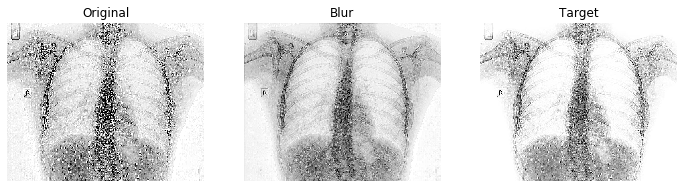

In [0]:
 
# dst = cv2.filter2D(img,-1,kernel)
fig, axes = plt.subplots(1, 2, figsize=(12,5))
plt.subplot(131), plt.imshow(im1, cmap='gray'), plt.title('Original'), 
plt.axis('off')
blur = cv2.blur(im1,(2,2))
plt.subplot(132), plt.imshow(blur, cmap='gray'), plt.title('Blur'), 
plt.axis('off')
plt.subplot(133), plt.imshow(im2, cmap='gray'), plt.title('Target'), 
plt.axis('off')
plt.show()


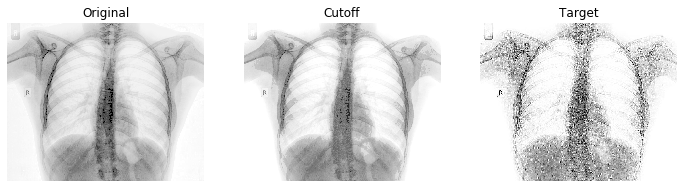

In [5]:
temp = im1.copy()
nrows,ncols = temp.shape

low = 200
high = 100
for row in range(nrows):
  for col in range(ncols):
    if temp[row,col] > low:
      if temp[row,col] + 15 > 255:
        temp[row,col] = 255
      else:
        temp[row,col] = temp[row,col] + 15

    elif temp[row,col] < high:
      temp[row,col] = temp[row,col] + 40


# dst = cv2.filter2D(img,-1,kernel)
fig, axes = plt.subplots(1, 2, figsize=(12,5))
plt.subplot(131), plt.imshow(im1, cmap='gray',vmin=0, vmax=255), plt.title('Original'), 
plt.axis('off')
plt.subplot(132), plt.imshow(temp, cmap='gray',vmin=0, vmax=255), plt.title('Cutoff'), 
plt.axis('off')
plt.subplot(133), plt.imshow(im2, cmap='gray',vmin=0, vmax=255), plt.title('Target'), 
plt.axis('off')
plt.show() 

im1 = temp